In [1]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import folium
from keplergl import KeplerGl

place_name = "Altstadt, Zurich, Switzerland"

graph = ox.graph_from_place(place_name)

ox.plot_graph_folium(graph)

In [2]:
area = ox.geocode_to_gdf(place_name)
area.head()

geometry  bbox_north  bbox_south  \
0  POLYGON ((8.52921 47.36921, 8.52999 47.36857, ...    47.38297   47.363206   

   bbox_east  bbox_west   place_id  osm_type   osm_id        lat       lon  \
0     8.5508   8.529205  307936779  relation  1693096  47.372233  8.542329   

                                        display_name     class  \
0  Altstadt, Zurich, District Zurich, Zurich, 800...  boundary   

             type  importance  
0  administrative    0.662702

In [3]:
buildings = ox.geometries_from_place(place_name, tags={'building':True})
restaurants = ox.geometries_from_place(place_name, 
                                       tags={"amenity": "restaurant"})
nodes, edges = ox.graph_to_gdfs(graph)

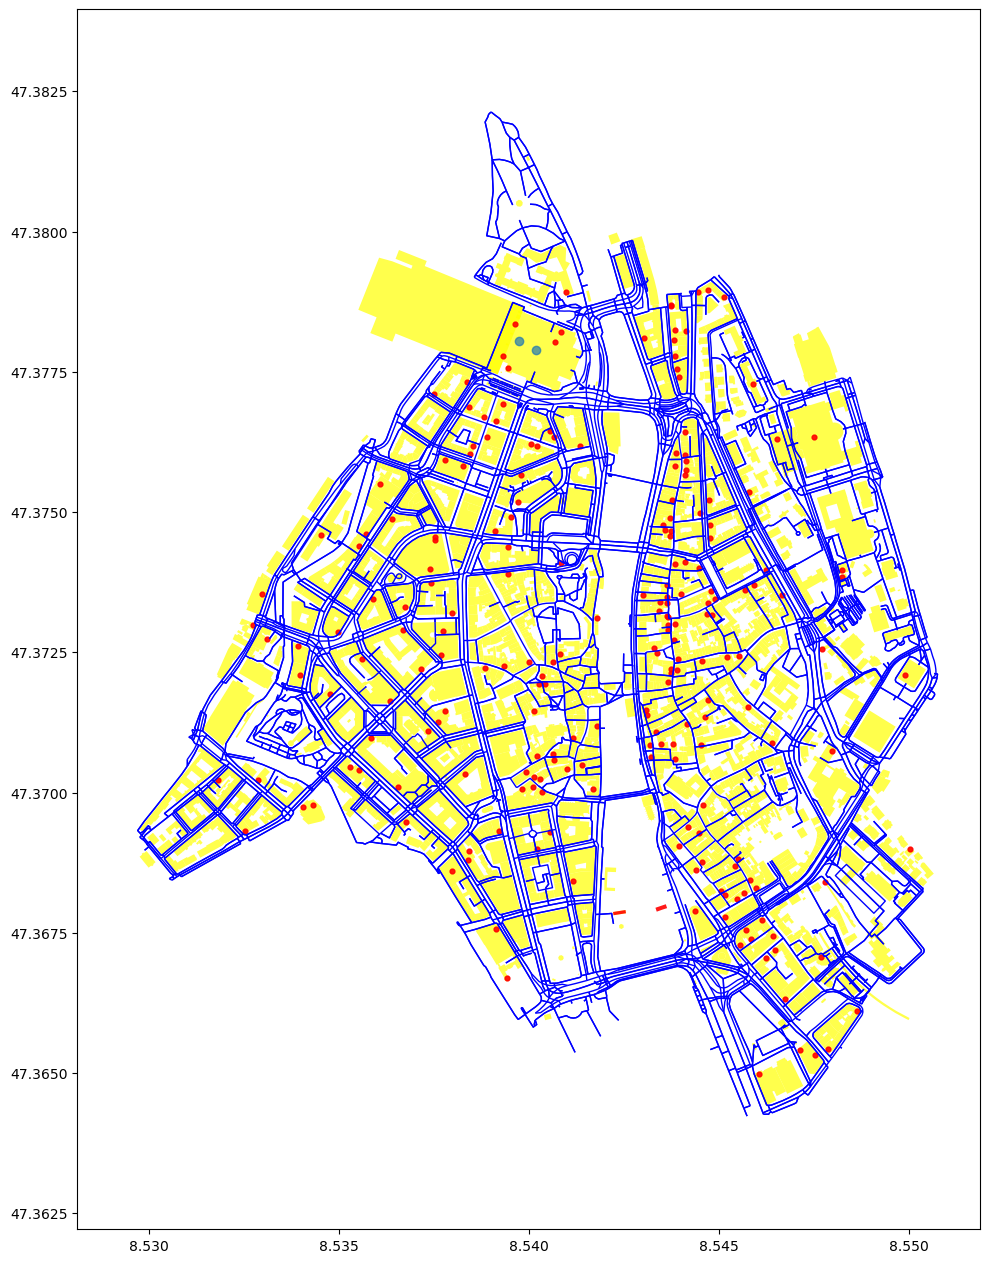

In [4]:
fig, ax = plt.subplots(figsize=(10, 14))
area.plot(ax=ax, facecolor='white')
edges.plot(ax=ax, linewidth=1, edgecolor='blue')
buildings.plot(ax=ax, facecolor='yellow', alpha=0.7)
restaurants.plot(ax=ax, color='red', alpha=0.9, markersize=12)
plt.tight_layout()

In [5]:
K_map = KeplerGl()
K_map.add_data(data=restaurants, name='Restaurants')
K_map.add_data(data=buildings, name='Buildings')
K_map.add_data(data=edges, name='Edges')
K_map.add_data(data=area, name='Area')
K_map.save_to_html()

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


C:\Users\samch\anaconda3\lib\site-packages\jupyter_client\session.py:718: UserWarning: Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant
  content = self.pack(content)


Map saved to keplergl_map.html!


In [6]:
K_map

KeplerGl(data={'Restaurants': {'index': [('node', 105459350), ('node', 119247298), ('node', 268467807), ('node…

In [7]:
it_restuarants = restaurants.loc[restaurants.cuisine.str.contains('italian')
                                    .fillna(False)].dropna(axis=1, how='all')
restuarant_choice = it_restuarants[it_restuarants['name'] == 'Antica Roma']
orig = list(graph)[993]
dest = ox.nearest_nodes(graph,
          restuarant_choice['geometry'][0].xy[0][0],
          restuarant_choice['geometry'][0].xy[1][0])
nodes[nodes.index == orig]

AttributeError: 'str' object has no attribute 'xy'

In [8]:
route = nx.shortest_path(graph, orig, dest, weight='length')
ox.plot_route_folium(graph, route, route_linewidth=6, node_size=0)

NameError: name 'dest' is not defined

In [28]:
#restuarant_choice
#restaurants['cuisine']
#restaurants
#restuarant_choice['geometry']
#restuarant_choice.dtypes
restuarant_choice['geometry'][0]
#restuarant_choice['geometry'][0][12]
#restuarant_choice['geometry'][0].xy[0][0]

'POINT (8.5318280000000009 47.3702231999999981)'

In [29]:
it_restuarants = restaurants.loc[restaurants.cuisine.str.contains('italian')
                                    .fillna(False)].dropna(axis=1, how='all')
restuarant_choice = it_restuarants[it_restuarants['name'] == 'Antica Roma']
orig = list(graph)[993]
dest = ox.nearest_nodes(graph,
          8.5318280000000009,
          47.3702231999999981)
nodes[nodes.index == orig]

y         x  street_count highway  ref  \
osmid                                                       
1941582704  47.37562  8.549321             5     NaN  NaN   

                            geometry  
osmid                                 
1941582704  POINT (8.54932 47.37562)

In [39]:
nodes[nodes.index == 9705210231]

y         x  street_count highway  ref  \
osmid                                                        
9705210231  47.370205  8.531719             4     NaN  NaN   

                            geometry  
osmid                                 
9705210231  POINT (8.53172 47.37020)

In [40]:
route = nx.shortest_path(graph, orig, dest, weight='length')
ox.plot_route_folium(graph, route, route_linewidth=6, node_size=0)